In [1]:
import matplotlib.pyplot as plt
import numpy as np

from importlib import reload
from matplotlib import rc
from neurobiases import (TriangularModel,
                         EMSolver,
                         TCSolver,
                         solver_utils,
                         plot)

%matplotlib inline

In [2]:
tm = TriangularModel(
    model='linear',
    parameter_design='direct_response',
    M=10,
    N=10,
    K=1,
    corr_cluster=0.4,
    corr_back=0.1,
    coupling_distribution='gaussian',
    coupling_sparsity=0.5,
    coupling_loc=0.0,
    coupling_scale=1,
    coupling_rng=10222021,
    tuning_distribution='gaussian',
    tuning_loc=0,
    tuning_scale=1,
    tuning_sparsity=0.5,
    tuning_rng=10222021
)

In [3]:
X, Y, y = tm.generate_samples(n_samples=2000, rng=23321)

In [4]:
solver = EMSolver(
    X, Y, y, K=1,
    solver='scipy_lbfgs',
    max_iter=20,
    tol=1e-7,
    initialization='random',
    save_hessian=True
)

In [5]:
solver.fit_em(verbose=True)

Initial marginal likelihood: -110911.95436169092.
Iteration 1: del=1.08818E+00, mll=9.7804978E+03
Iteration 2: del=1.30472E-01, mll=1.1056582E+04
Iteration 3: del=2.19604E-02, mll=1.1299389E+04
Iteration 4: del=7.92050E-03, mll=1.1388885E+04
Iteration 5: del=4.05765E-03, mll=1.1435098E+04
Iteration 6: del=2.31663E-03, mll=1.1461588E+04
Iteration 7: del=1.40661E-03, mll=1.1477710E+04
Iteration 8: del=8.94235E-04, mll=1.1487974E+04
Iteration 9: del=5.87585E-04, mll=1.1494724E+04
Iteration 10: del=3.96284E-04, mll=1.1499280E+04
Iteration 11: del=2.72715E-04, mll=1.1502416E+04
Iteration 12: del=1.91904E-04, mll=1.1504623E+04
Iteration 13: del=1.38196E-04, mll=1.1506213E+04
Iteration 14: del=9.85928E-05, mll=1.1507347E+04
Iteration 15: del=7.15990E-05, mll=1.1508171E+04
Iteration 16: del=5.22839E-05, mll=1.1508773E+04
Iteration 17: del=3.85013E-05, mll=1.1509216E+04
Iteration 18: del=2.84354E-05, mll=1.1509543E+04
Iteration 19: del=2.09947E-05, mll=1.1509785E+04
Iteration 20: del=1.57333E-0

In [6]:
len(solver.all_results)

1921

In [7]:
gs = []
hesss = []
nits = []
for opt in solver.all_results:
    g = opt.jac
    hess_inv = opt.hess_inv
    nit = opt.nit
    gs.append(g)
    hesss.append(hess_inv)
    nits.append(nit)
    print(nit, np.linalg.norm(g), np.linalg.norm(hess_inv @ g))

1 32.62855000680926 32.62855000680926
2 14.018412411179437 14.01841241188669
3 5.86998389540262 5.8699838935408
4 3.3092870193382047 3.309287018666277
5 2.3845912662978477 2.384591267539817
6 6.274526458826108 6.274526397314987
7 3.00343936473149 3.0034393553035823
8 2.996945802443555 2.996945810814875
9 5.0394071488664265 5.039406791006603
10 5.684785824002877 5.684785190207687
11 3.354581939826693 3.3545819843991858
12 2.9551960956482586 2.955196046825404
13 3.015299218801325 3.015299182312056
14 6.031719733053005 6.031718858884756
15 4.663812867240256 4.663812491957227
16 3.5831051088561705 3.583104634699812
17 4.817371066328553 4.817370753930208
18 3.987785992391313 3.9877853239881778
19 6.305116769775167 6.305116984027755
20 4.979071945895056 4.9790711003997385
21 4.627811428890086 4.627809039225667
22 7.985314709579773 7.9853086205781345
23 5.926902569295197 5.926902208030442
24 3.6213973910526307 3.621396351842004
25 4.157177327451122 4.157175460023485
26 4.8319041476198095 4.83

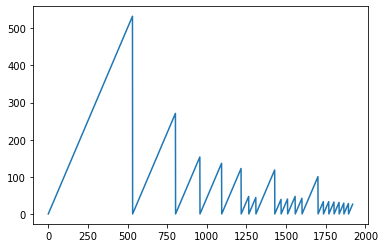

In [8]:
plt.plot(nits)

In [9]:
ds = [np.linalg.norm(h.todense() - np.eye(h.shape[0])) for h in hesss]

/home/jesse/anaconda3/envs/neurobiases/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


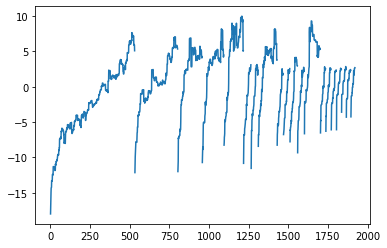

In [13]:
plt.plot(np.log(ds))